In [1]:
import pandas as pd

In [2]:
trxn=pd.read_csv('Retail_Data_Transactions.csv')
trxn

,customer_id,trans_date,tran_amount
0,CS5295,11-Feb-13,35
1,CS4768,15-Mar-15,39
2,CS2122,26-Feb-13,52
3,CS1217,16-Nov-11,99
4,CS1850,20-Nov-13,78
...,...,...,...
124995,CS8433,26-Jun-11,64
124996,CS7232,19-Aug-14,38
124997,CS8731,28-Nov-14,42
124998,CS8133,14-Dec-13,13


In [3]:
response= pd.read_csv('Retail_Data_Response.csv')
response

,customer_id,response
0,CS1112,0
1,CS1113,0
2,CS1114,1
3,CS1115,1
4,CS1116,1
...,...,...
6879,CS8996,0
6880,CS8997,0
6881,CS8998,0
6882,CS8999,0


In [4]:
df= trxn.merge(response, on='customer_id', how='left')
df

,customer_id,trans_date,tran_amount,response
0,CS5295,11-Feb-13,35,1.0
1,CS4768,15-Mar-15,39,1.0
2,CS2122,26-Feb-13,52,0.0
3,CS1217,16-Nov-11,99,0.0
4,CS1850,20-Nov-13,78,0.0
...,...,...,...,...
124995,CS8433,26-Jun-11,64,0.0
124996,CS7232,19-Aug-14,38,0.0
124997,CS8731,28-Nov-14,42,0.0
124998,CS8133,14-Dec-13,13,0.0


In [5]:
# features

#df.dtypes
#df.shape
#df.tail()
df.describe()

,tran_amount,response
count,125000.000000,124969.000000
mean,64.991912,0.110763
std,22.860006,0.313840
min,10.000000,0.000000
25%,47.000000,0.000000
50%,65.000000,0.000000
75%,83.000000,0.000000
max,105.000000,1.000000


In [6]:
# MISSING VALUES

df.isnull().sum()

customer_id     0
trans_date      0
tran_amount     0
response       31
dtype: int64

In [7]:
df=df.dropna()
df

,customer_id,trans_date,tran_amount,response
0,CS5295,11-Feb-13,35,1.0
1,CS4768,15-Mar-15,39,1.0
2,CS2122,26-Feb-13,52,0.0
3,CS1217,16-Nov-11,99,0.0
4,CS1850,20-Nov-13,78,0.0
...,...,...,...,...
124995,CS8433,26-Jun-11,64,0.0
124996,CS7232,19-Aug-14,38,0.0
124997,CS8731,28-Nov-14,42,0.0
124998,CS8133,14-Dec-13,13,0.0


In [8]:
# change dtypes

df['trans_date']= pd.to_datetime(df['trans_date'])
df['response']= df['response'].astype('int64')
df

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_8080\415373954.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['trans_date']= pd.to_datetime(df['trans_date'])
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_8080\415373954.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['trans_date']= pd.to_datetime(df['trans_date'])
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_8080\415373954.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

,customer_id,trans_date,tran_amount,response
0,CS5295,2013-02-11,35,1
1,CS4768,2015-03-15,39,1
2,CS2122,2013-02-26,52,0
3,CS1217,2011-11-16,99,0
4,CS1850,2013-11-20,78,0
...,...,...,...,...
124995,CS8433,2011-06-26,64,0
124996,CS7232,2014-08-19,38,0
124997,CS8731,2014-11-28,42,0
124998,CS8133,2013-12-14,13,0


In [9]:
df.dtypes


customer_id            object
trans_date     datetime64[ns]
tran_amount             int64
response                int64
dtype: object

In [10]:
# check for outliers
# Method 1 : Z-SCORE

from scipy import stats
import numpy as np

#calc z score
z_scores= np.abs(stats.zscore(df['tran_amount']))

#set a threshold

threshold= 3

outliers= z_scores>threshold


print(df[outliers])


Empty DataFrame
Columns: [customer_id, trans_date, tran_amount, response]
Index: []


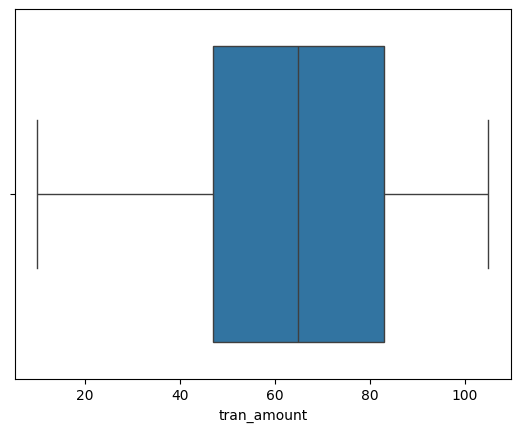

In [11]:
# Method 2 : Box Plot
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=df['tran_amount'])
plt.show()

In [12]:
# creating new columns

df['month']= df['trans_date'].dt.month
df

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_8080\1714070202.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month']= df['trans_date'].dt.month


,customer_id,trans_date,tran_amount,response,month
0,CS5295,2013-02-11,35,1,2
1,CS4768,2015-03-15,39,1,3
2,CS2122,2013-02-26,52,0,2
3,CS1217,2011-11-16,99,0,11
4,CS1850,2013-11-20,78,0,11
...,...,...,...,...,...
124995,CS8433,2011-06-26,64,0,6
124996,CS7232,2014-08-19,38,0,8
124997,CS8731,2014-11-28,42,0,11
124998,CS8133,2013-12-14,13,0,12


In [13]:
# Which 3 months have had the highest transaction amounts?

monthly_Sales= df.groupby('month')['tran_amount'].sum()
monthly_Sales= monthly_Sales.sort_values(ascending=False).reset_index().head(3)
monthly_Sales

,month,tran_amount
0,8,726775
1,10,725058
2,1,724089


In [14]:
# Customers having highest num of orders
customer_counts=df['customer_id'].value_counts().reset_index()
customer_counts.columns=['customer_id','count']
# sorting to get top customers
top_5_cus=customer_counts.sort_values(by='count',ascending=False).head()
top_5_cus

,customer_id,count
0,CS4424,39
1,CS4320,38
2,CS3799,36
3,CS3013,35
4,CS1215,35


<Axes: xlabel='customer_id', ylabel='count'>

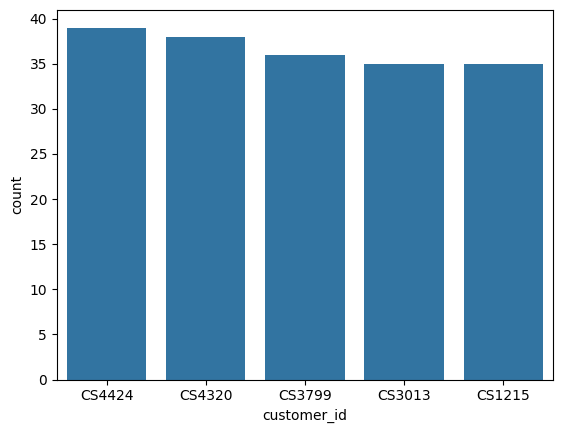

In [15]:
# lets plot a chart for above information
sns.barplot(x='customer_id',y='count',data=top_5_cus)

In [16]:
# Customers having highest value of orders

customer_sales=df.groupby('customer_id')['tran_amount'].sum().reset_index()
customer_sales
top_5_sales=customer_sales.sort_values(by='tran_amount',ascending=False).head()
top_5_sales


,customer_id,tran_amount
3312,CS4424,2933
3208,CS4320,2647
4640,CS5752,2612
3548,CS4660,2527
2687,CS3799,2513


<Axes: xlabel='customer_id', ylabel='tran_amount'>

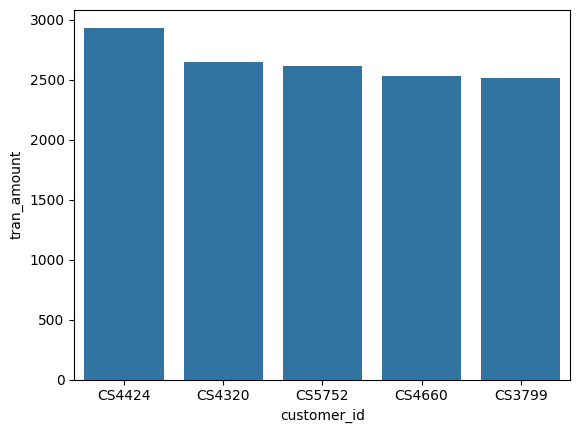

In [17]:
# lets plot a chart for above information
sns.barplot(x='customer_id',y='tran_amount',data=top_5_sales)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_8080\1589258329.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month_year']=df['trans_date'].dt.to_period('M')


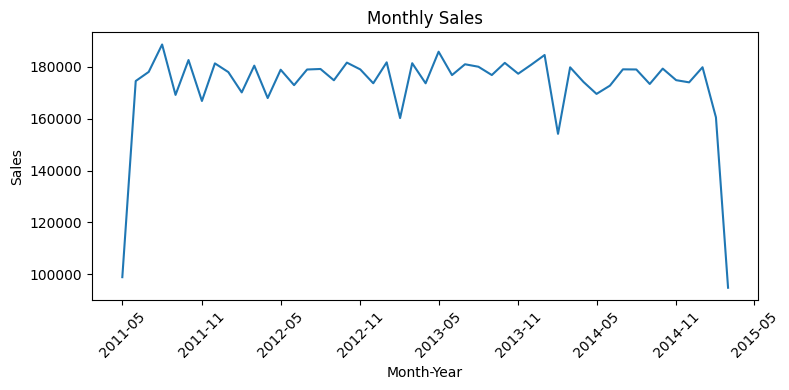

In [18]:
# experimenting with Advanced Analytics

# 1. Time Series Analysis
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

#creating a new column called 'month_year'
df['month_year']=df['trans_date'].dt.to_period('M')
monthly_sales=df.groupby('month_year')['tran_amount'].sum()

# Convert the PeriodIndex to DateTimeIndex
monthly_sales.index = monthly_sales.index.to_timestamp()

# plotting the chart
plt.figure(figsize=(8,4))
plt.plot(monthly_sales.index, monthly_sales.values)  # Plot the data
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  # Format the x-axis labels
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=6))  # Set the x-axis interval
plt.xlabel('Month-Year')
plt.ylabel('Sales')
plt.title('Monthly Sales')
plt.xticks(rotation=45)  # Rotate the x-axis labels
plt.tight_layout()  # Adjust the layout for better visibility
plt.show()

In [19]:
# 2. Cohort Segmenatation

# Recency will be the maximum of trans_date
recency=df.groupby('customer_id')['trans_date'].max()

# Recency will be the maximum of trans_date
frequency=df.groupby('customer_id')['trans_date'].count()

# Monetary will be the sum of tran_amount
monetary=df.groupby('customer_id')['tran_amount'].sum()

# Combine all three into a DataFrame
rfm=pd.DataFrame({'recency':recency,'frequency':frequency,'monetary':monetary})

# function to classify customers based on their recency,frequency and monetary

def segment_customer(row):
    if row['recency'].year >= 2012 and row['frequency'] >= 15 and row['monetary'] > 1000:
        return 'P0'
    elif (2011 <= row['recency'].year < 2012) and (10 < row['frequency'] <= 15) and (500 < row['monetary'] <= 1000):
        return 'P1'
    else:
        return 'P2'

rfm['Segment'] = rfm.apply(segment_customer, axis=1)
rfm

,recency,frequency,monetary,Segment
customer_id,,,,
CS1112,2015-01-14,15,1012,P0
CS1113,2015-02-09,20,1490,P0
CS1114,2015-02-12,19,1432,P0
CS1115,2015-03-05,22,1659,P0
CS1116,2014-08-25,13,857,P2
...,...,...,...,...
CS8996,2014-12-09,13,582,P2
CS8997,2014-06-28,14,543,P2
CS8998,2014-12-22,13,624,P2


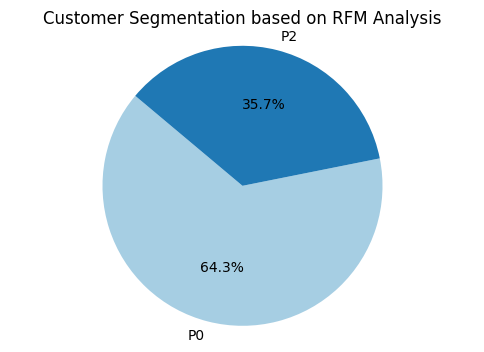

In [20]:
# plotting a pie chart to visualize customer segmentation
# Count customers in each segment
segment_counts = rfm['Segment'].value_counts()
plt.figure(figsize=(6, 4))
plt.pie(segment_counts, labels=segment_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Customer Segmentation based on RFM Analysis')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

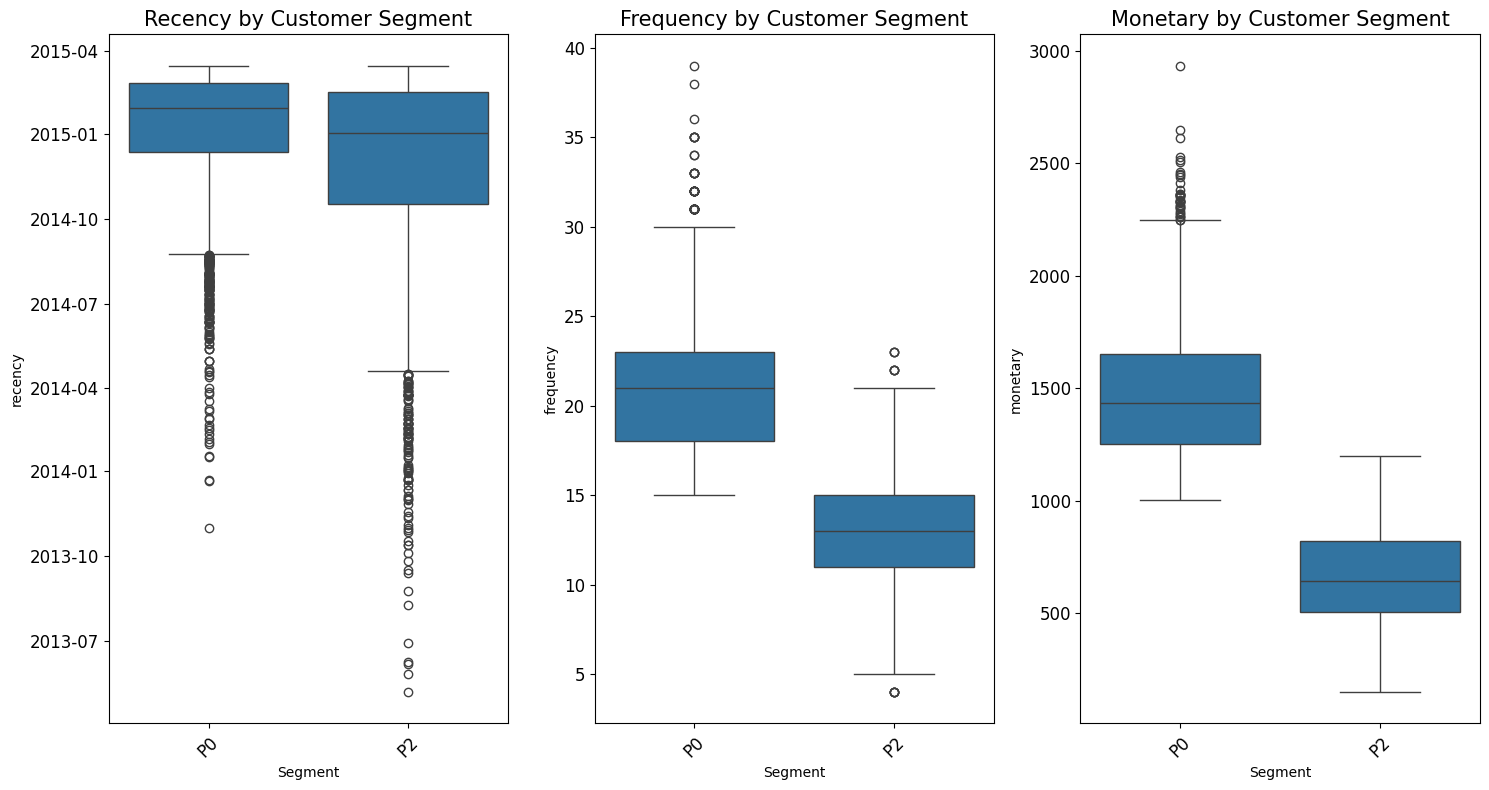

In [21]:
# Box plot Analysis for Customer Segmentation
# Plotting box plots
plt.figure(figsize=(15, 8))

# Box plot for Recency
plt.subplot(1, 3, 1)
sns.boxplot(x='Segment', y='recency', data=rfm)
plt.title('Recency by Customer Segment', fontsize=15)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Box plot for Frequency
plt.subplot(1, 3, 2)
sns.boxplot(x='Segment', y='frequency', data=rfm)
plt.title('Frequency by Customer Segment', fontsize=15)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Box plot for Monetary
plt.subplot(1, 3, 3)
sns.boxplot(x='Segment', y='monetary', data=rfm)
plt.title('Monetary by Customer Segment', fontsize=15)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_8080\4031044172.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(rfm['recency'])


Text(0.5, 0, 'Days since last purchase')

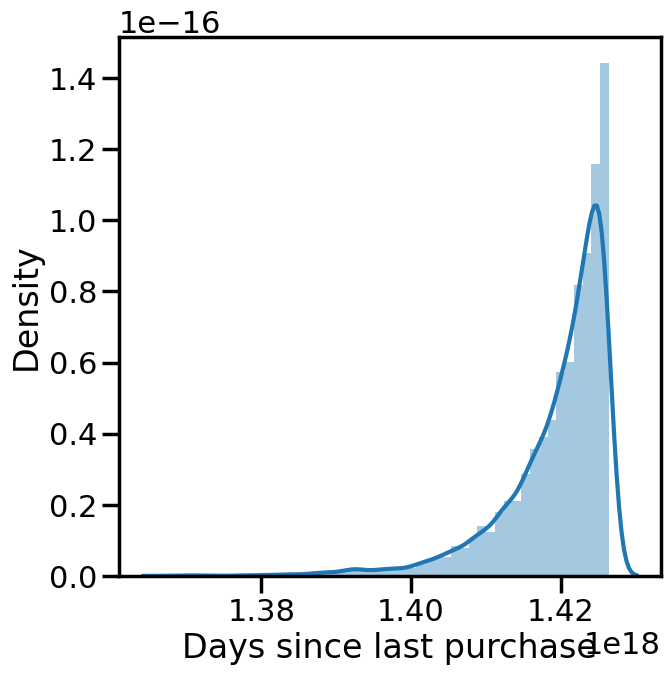

In [22]:
#RFM Analysis:
#I think we should take a look at the distribution because plotting can give a really good idea of what is up with the customers:

# Plotting for the last day since the customer made a purchase:

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(7,7))
sns.set_context("poster")
sns.distplot(rfm['recency'])
plt.xlabel('Days since last purchase')

<Axes: xlabel='response'>

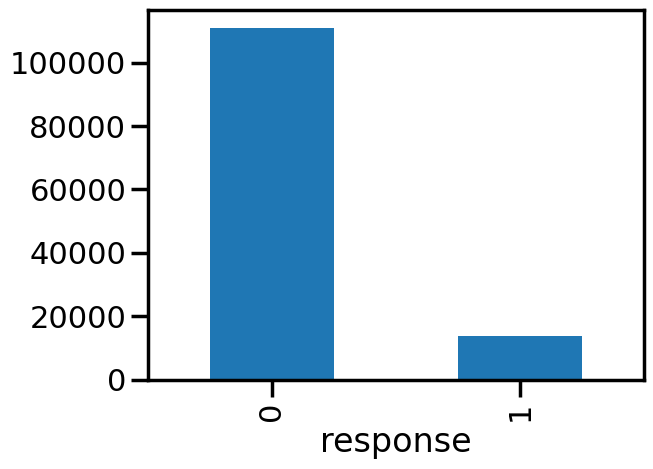

In [23]:
# 3. CHURN Analysis

# Counting the number of churned and active customers
churn_counts = df['response'].value_counts()

# Plotting the churn count
churn_counts.plot(kind='bar')

<Axes: xlabel='month_year'>

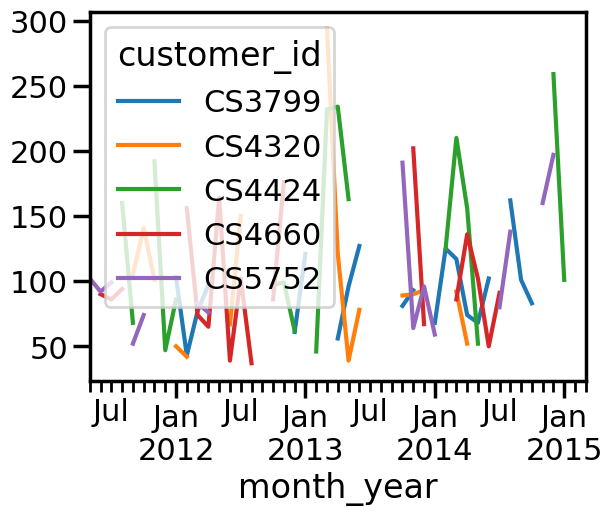

In [24]:
# 4. Analyzing top Customers

# Top 5 customers
top_5_customers = monetary.sort_values(ascending=False).head(5).index

# Filter transactions of top 5 customers
top_customers_df = df[df['customer_id'].isin(top_5_customers)]

# Plot their monthly sales
top_customers_sales = top_customers_df.groupby(['customer_id', 'month_year'])['tran_amount'].sum().unstack(level=0)
top_customers_sales.plot(kind='line')